# Polychromatic light passing through a grating


In [ ]:
import torch
import torchoptics
import matplotlib.pyplot as plt

from torchoptics import Field, System
from torchoptics.elements import Modulator
from torchoptics.profiles import gaussian, blazed_grating

In [ ]:
# Set simulation properties
shape = 500
waist_radius = 150e-6
wavelengths = [700e-9, 550e-9, 450e-9]  # Red, green, blue
grating_period = 100e-6
device = "cuda" if torch.cuda.is_available() else "cpu"

torchoptics.set_default_spacing(10e-6)

In [ ]:
def plot_rgb_intensities(fields, title=None):
    # Plot the RGB intensities of the fields, with each field represented by a different color channel.
    if not isinstance(fields, list) or len(fields) != 3:
        raise ValueError("`fields` must be a list of 3 Fields.")
    rgb_intensities = [field.intensity() for field in fields]
    rgb_intensities = torch.stack(rgb_intensities, dim=-1).cpu().numpy()
    plt.imshow(rgb_intensities)
    plt.axis("off")
    plt.title(title)
    plt.show()

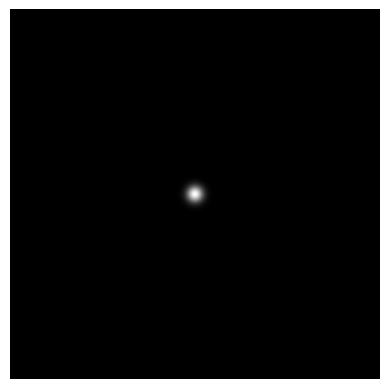

In [ ]:
# Create three gaussian fields with different wavelengths (red, green, blue)
gaussian_data = gaussian(shape, waist_radius).real
gaussian_data /= gaussian_data.max()  # Normalize the field to have a maximum intensity of 1
fields = [Field(gaussian_data, wavelength).to(device) for wavelength in wavelengths]

plot_rgb_intensities(fields)  # Plot the RGB intensities of the fields

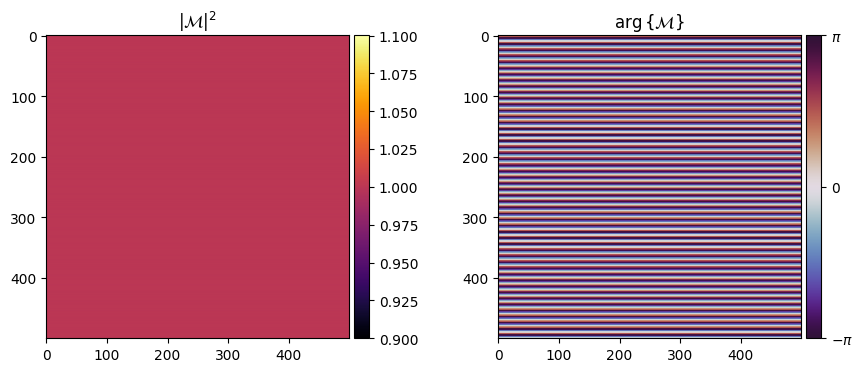

In [ ]:
# Initialize a system with a blazed grating modulator
system = System(Modulator(blazed_grating(shape, grating_period))).to(device)
system[0].visualize()

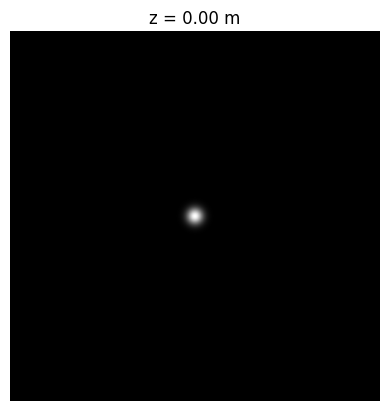

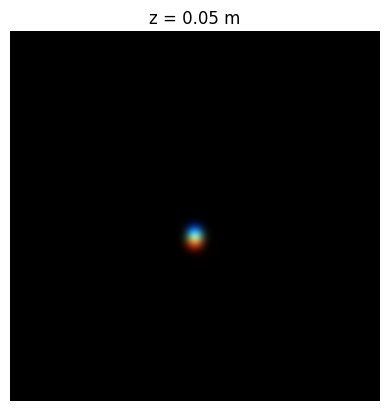

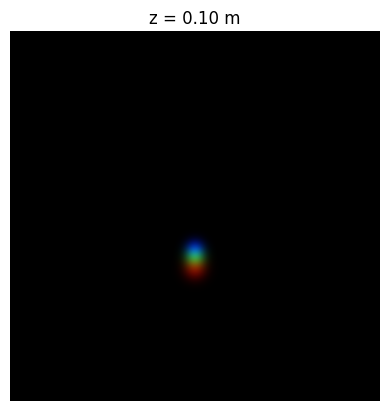

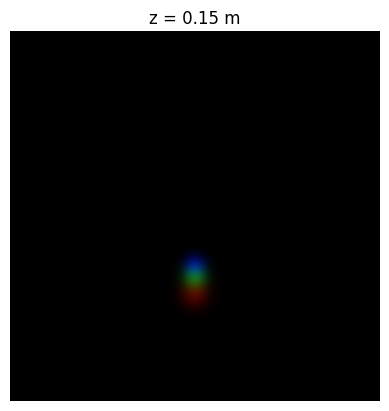

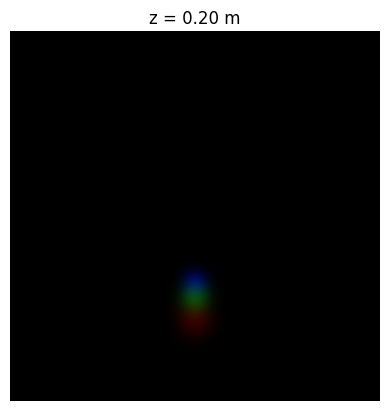

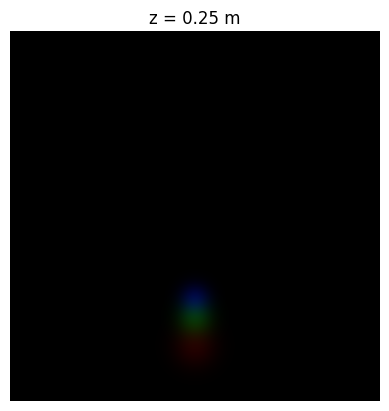

In [ ]:
# Propagate the fields through the system and plot the RGB intensities
propagation_distances = torch.arange(0, 0.3, 0.05)

for z in propagation_distances:
    propagated_fields = [system.measure_at_z(field, z) for field in fields]
    plot_rgb_intensities(propagated_fields, title=f"z = {z:.2f} m")